<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M2/notebooks/M2_Directed_Networks_hands_on_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Welcome to your second part of the introduction to network analysis. In this session you will learn:

1. What directed networks are, and when that matters.
2. How different measures have to be calculated in directed networks.
3. What multidimensional networks are, and how they matter.
4. How to compare network measures between graphs, and with random graphs

# Introduction

Hello so far :)

# Directed networks

* Up to now, we did not pay attention to the direction of edges, and assumed them to be symetric (`A->B == B->A`). this makes sense in a lot of setting, for instance when we look at co-occurence networks.
* However, in many cases, such as friendship networks, that might not be the case (the person you name a close friend not necessarily thinks the same about you).
* In such cases, we would like to take this directionality into account, and analyse **directed networks**.

Lets look a brief example of highschool students data, which had to name their close friends.


To work with the same example as presented in the R exercises we will need to install the names package to generate random names as well as download and unzip the data "manually"

the `!`in front of the commands indicates the use of the unix/linux system behind the Python notebook.


In [7]:
!pip install names -qq

     |████████████████████████████████| 798kB 2.8MB/s 


In [8]:
!wget https://networks.skewed.de/net/highschool/files/highschool.csv.zip
!unzip highschool.csv.zip

--2020-10-08 20:42:58--  https://networks.skewed.de/net/highschool/files/highschool.csv.zip
Resolving networks.skewed.de (networks.skewed.de)... 49.12.93.194
Connecting to networks.skewed.de (networks.skewed.de)|49.12.93.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3736 (3.6K) [application/zip]
Saving to: ‘highschool.csv.zip’

highschool.csv.zip  100%[===================>]   3.65K  --.-KB/s    in 0s      

2020-10-08 20:42:59 (143 MB/s) - ‘highschool.csv.zip’ saved [3736/3736]

Archive:  highschool.csv.zip
  inflating: edges.csv               
  inflating: nodes.csv               
  inflating: gprops.csv              


In [91]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import names

# For visualization
!pip install -U bokeh
!pip install -q holoviews

sns.set()

     |████████████████████████████████| 8.8MB 2.5MB/s 
     |████████████████████████████████| 2.2MB 31.0MB/s 
  Created wheel for bokeh: filename=bokeh-2.2.1-cp36-none-any.whl size=9294619 sha256=b6d1b6cff285a24635202b4f7d87ef22a2cf5bbbba856136d1833c72590b5a29
  Stored in directory: /root/.cache/pip/wheels/59/fb/3d/5b17926d25d58b9701b6aa33e812c0a8ac8bc5538a096be038
Successfully built bokeh
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
  Found existing installation: bokeh 2.1.1
    Uninstalling bokeh-2.1.1:
      Successfully uninstalled bokeh-2.1.1


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
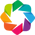

In [93]:
# Import the libraries and link to the bokeh backend
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))




Again, here it sometimes happens that friendship is not reciprocal, so we will create a directed friendship graph.

It takes some munging to get the data right and attach the names.


In [10]:
# load edges

edges = pd.read_csv('edges.csv')

In [11]:
edges.head(5)

# source   target   weight
0         0        1        1
1         0        2        2
2         0        3        2
3         0        4        1
4         0        5        1

In [12]:
# Test the ransom name generator. Need only males since the study is about a male highschool in the 50s
names.get_full_name(gender='male').replace(' ','-')

'Anthony-Horowitz'

In [13]:
edges.columns = ['source', 'target', 'weight']

In [14]:
# Collect all unique nodes from the edgelist

nodes = set(edges.source) | set(edges.target)

In [15]:
# Generate 70 ransom names with '-' separator using a list comprehension - a loop in a list

names = [names.get_full_name(gender='male').replace(' ','-') for i in range(70)]

In [16]:
# Generate a mapper dictionary to translate number-nodes into fake names

mapper = dict(zip(nodes,names))

In [17]:
# Tr99anslate

edges['source_name'] = edges.source.map(lambda t: mapper[t])
edges['target_name'] = edges.target.map(lambda t: mapper[t])

In [18]:
# Now generate the network

g = nx.from_pandas_edgelist(edges,
                            source='source_name',
                            target='target_name',
                            edge_attr='weight',
                            create_using = nx.DiGraph)


* Lets plot this network briefly to get a sense.
* Notice that we have edges for two years, so we can do a facet plot for every year.



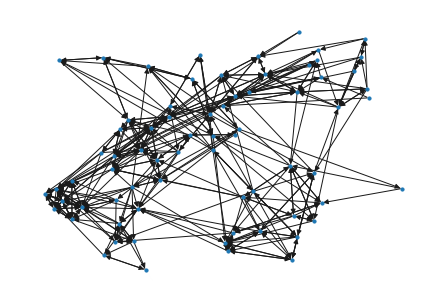

In [19]:
# Quick visualization
nx.draw(g, with_labels = False, node_size=10)

### Visualization alternative - Pyvis

In [1]:
!pip install pyvis -qq

In [30]:
from pyvis import network as net

In [34]:
n = net.Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook=True, heading='High School')
n.from_nx(g) # Initialize from NetworkX
n.show_buttons(filter_=['physics']) # Add controls (optional)
n.show('example.html') # In colab need to download the HTML


## Centrality measures

Our network is now directed, meaning a node-pair now has two different roles:

* **Ego:** The node the edge loriginates from.
* **Alter:** The node the edge leads to.

Consequently, most network metrics have to take this directionality into account. For example, degree centrality is now differentiated between the **in-degree** centrality (now many edges lead to the node) and the **out-degree** centrality (now many edges lead to the node)



In [41]:
nx.set_node_attributes(g, dict(g.in_degree(weight='weight')), 'in_degree')
nx.set_node_attributes(g, dict(g.out_degree(weight='weight')), 'out_degree')


## Community Structures

Now it is getting a bit more complicated. Most community detection algorithms implemented in `NetworkX` only work with undirected networks. So, now we could do 2 things:

1. Convert the network in an undirected one.
2. Use the "edge betweenness" algorithm, the only one implemented that can handle directed networks.



In [42]:
import community as community_louvain

In [43]:
# We go for option 1
g_und = nx.to_undirected(g)

In [44]:
partition = community_louvain.best_partition(g_und)

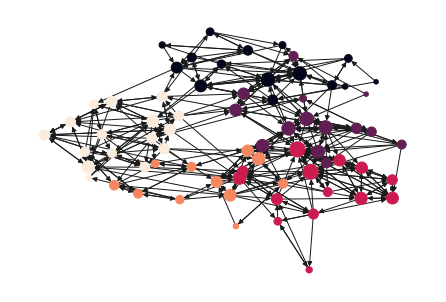

In [45]:
nx.draw_kamada_kawai(g, node_color=list(partition.values()), node_size=[v * 10 for v in dict(g.degree()).values()])

## Introduction to the case

* Emmanuel Lazega, The Collegial Phenomenon: The Social Mechanisms of Cooperation Among Peers in a Corporate Law Partnership, Oxford University Press (2001).

### Data 
This data set comes from a network study of corporate law partnership that was carried out in a Northeastern US corporate law firm, referred to as SG&R, 1988-1991 in New England. It includes (among others) measurements of networks among the 71 attorneys (partners and associates) of this firm, i.e. their strong-coworker network, advice network, friendship network, and indirect control networks. Various members' attributes are also part of the dataset, including seniority, formal status, office in which they work, gender, lawschool attended, individual performance measurements (hours worked, fees brought in), attitudes concerning various management policy options, etc. This dataset was used to identify social processes such as bounded solidarity, lateral control, quality control, knowledge sharing, balancing powers, regulation, etc. among peers.

### Setting
* What do corporate lawyers do? Litigation and corporate work.
* Division of work and interdependencies.
* Three offices, no departments, built-in pressures to grow, intake and assignment rules.
* Partners and associates: hierarchy, up or out rule, billing targets.
* Partnership agreement (sharing benefits equally, 90% exclusion rule, governance structure, elusive committee system) and incompleteness of the contracts.
* Informal, unwritten rules (ex: no moonlighting, no investment in buildings, no nepotism, no borrowing to pay partners, etc.).
* Huge incentives to behave opportunistically ; thus the dataset is appropriate for the study of social processes that make cooperation among rival partners possible. 
* Sociometric name generators used to elicit coworkers, advice, and 'friendship' ties at SG&R:"Here is the list of all the members of your Firm."

The networks where created according to the follwoing questionaire:

* Strong coworkers network: "Because most firms like yours are also organized very informally, it is difficult to get a clear idea of how the members really work together. Think back over the past year, consider all the lawyers in your Firm. Would you go through this list and check the names of those with whom you have worked with. By "worked with" I mean that you have spent time together on at least one case, that you have been assigned to the same case, that they read or used your work product or that you have read or used their work product; this includes professional work done within the Firm like Bar association work, administration, etc."
* Basic advice network: "Think back over the past year, consider all the lawyers in your Firm. To whom did you go for basic professional advice? For instance, you want to make sure that you are handling a case right, making a proper decision, and you want to consult someone whose professional opinions are in general of great value to you. By advice I do not mean simply technical advice."
* 'Friendship' network:
"Would you go through this list, and check the names of those you socialize with outside work. You know their family, they know yours, for instance. I do not mean all the people you are simply on a friendly level with, or people you happen to meet at Firm functions." 

## Data preperation

###  Load the data

Lets load the data! The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm.

In [52]:
mat_friendship = pd.read_table("https://sds-aau.github.io/SDS-master/M2/data/LazegaLawyers/ELwork.dat", sep= ' ', header=None) 
mat_advice = pd.read_table("https://sds-aau.github.io/SDS-master/M2/data/LazegaLawyers/ELadv.dat", sep= ' ', header=None) 
mat_work = pd.read_table("https://sds-aau.github.io/SDS-master/M2/data/LazegaLawyers/ELwork.dat", sep= ' ', header=None) 

In [54]:
mat_friendship.head()

0   1   2   3   4   5   6   7   8   ...  62  63  64  65  66  67  68  69  70
0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   1   0   0  ...   0   1   0   0   0   0   0   0   0
2   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
3   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   1   0
4   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   0   0   0   0

[5 rows x 71 columns]

In [55]:
G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

In [56]:
print(nx.info(G_friendship))
print(nx.info(G_advice))
print(nx.info(G_work))

Name: 
Type: DiGraph
Number of nodes: 71
Number of edges: 756
Average in degree:  10.6479
Average out degree:  10.6479
Name: 
Type: DiGraph
Number of nodes: 71
Number of edges: 961
Average in degree:  13.5352
Average out degree:  13.5352
Name: 
Type: DiGraph
Number of nodes: 71
Number of edges: 756
Average in degree:  10.6479
Average out degree:  10.6479


In [75]:
attributes = pd.read_table("https://sds-aau.github.io/SDS-master/M2/data/LazegaLawyers/ELattr.dat", delimiter=r"\s+", header=None) 

In [76]:
attributes.head()

0  1  2  3   4   5  6  7
0  1  1  1  1  31  64  1  1
1  2  1  1  1  32  62  2  1
2  3  1  1  2  13  67  1  1
3  4  1  1  1  31  59  2  3
4  5  1  1  2  31  59  1  2

In [77]:
attributes=attributes.round().astype(int)

In [78]:
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]

In [79]:
attributes.set_index('id',inplace=True)

In [80]:
cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 

In [81]:
attributes.replace(cleanup_nums, inplace=True)

In [82]:
attributes.head()

seniority gender    office  tenure  age    practice         school
id                                                                   
1    Partner   Male    Boston      31   64  Litigation  Harvard, Yale
2    Partner   Male    Boston      32   62   Corporate  Harvard, Yale
3    Partner   Male  Hartford      13   67  Litigation  Harvard, Yale
4    Partner   Male    Boston      31   59   Corporate         Others
5    Partner   Male  Hartford      31   59  Litigation           Ucon

In [83]:
attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 1 to 71
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seniority  71 non-null     object
 1   gender     71 non-null     object
 2   office     71 non-null     object
 3   tenure     71 non-null     int64 
 4   age        71 non-null     int64 
 5   practice   71 non-null     object
 6   school     71 non-null     object
dtypes: int64(2), object(5)
memory usage: 4.4+ KB


In [84]:
attributes_dict=attributes.T.to_dict()

In [85]:
nx.set_node_attributes(G_friendship, attributes_dict)
nx.set_node_attributes(G_advice, attributes_dict)
nx.set_node_attributes(G_work, attributes_dict)

In [86]:
print(nx.get_node_attributes(G_friendship, 'seniority'))

{1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Partner', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Associate', 64: 'Asso

## Calculate dimensional centralities

There might be better ways to do that (still experimenting), but for now lets first create centralities upfront for all networks. We for now only look at the in-degree.

In [87]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [88]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [97]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [98]:
g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right'
                                                                        )



In [99]:
show(hv.render(g_plot))

In [100]:
g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='cent_degree', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

In [101]:
g_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

## Assortiativity

We can also calculate another interested measure, particularly in social networks: Assortiativity. In a nutshell, it measures if two nodes that share certain characteristics ahve a higher or lower probability to be connected.

For details, check:

* Newman, M. E. J. (27 February 2003). "Mixing patterns in networks". Physical Review E. American Physical Society (APS). 67 (2): 026126

In [102]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')	

-0.20806941431670264

In [103]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')	

-0.010938461127009082

In [104]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

0.008842789541609062

## Reciprocity

Anotyher interesting question usually is, if directed edges are reciptocated, meaning that an edge between `i,j` makes an edge between `j,i` more likely

In [105]:
nx.overall_reciprocity(G_friendship)

1.0

In [106]:
nx.overall_reciprocity(G_advice)

0.20187304890738814

In [107]:
nx.overall_reciprocity(G_work)

1.0